# Walmart Challenge - EDA

In [117]:
# imports
import numpy as np
import pandas as pd

# Data-Viz 
import matplotlib.pyplot as plt
import plotly.plotly as py
# import plotly.graph_objs as go



## Load Data

In [11]:
df = pd.read_csv('train.csv', parse_dates=[2])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


The dataset consist on 421570 rows containing weekly sales of Walmart's `(Store,Dept)` pairs from `2010-02-05` to `2012-10-26`. Additionally, the dataframe has a column named `IsHoliday`

In [78]:
print('Summary:\n shape: {}\n t_start: {}\n t_end: {}'.format(df.shape, df['Date'].min().date().strftime(format='%Y-%m-%d'), 
                                                        df['Date'].max().date().strftime(format='%Y-%m-%d')))
print('\nTypes:')
df.dtypes

Summary:
 shape: (421570, 5)
 t_start: 2010-02-05
 t_end: 2012-10-26

Types:


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [52]:
#  Print basic statistics
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Check for NaN or null elements in the dataset, note that the number of falses equals the total number of rows for each column. In other words, no `NaN`

In [74]:
print('Checking for NaN values....')
for col in df.columns:
    print(df[col].isna().value_counts())

Checking for NaN values....
False    421570
Name: Store, dtype: int64
False    421570
Name: Dept, dtype: int64
False    421570
Name: Date, dtype: int64
False    421570
Name: Weekly_Sales, dtype: int64
False    421570
Name: IsHoliday, dtype: int64


## Exercise 1
Plot the mean weekly sales for all stores along the whole time period available.

In [98]:
# Start by constructing the dataframe: group by Date and aggregate the Weekly_Sales column
by_date = df.sort_values('Date').groupby(['Date'], as_index=False).agg({'Weekly_Sales': ['mean', 'std', 'count']})
by_date.columns = by_date.columns.droplevel().map(str)
by_date.columns = ['Date', 'mean_weekly_sales', 'std_weekly_sales', 'count_weekly_sales']
by_date.head()


,Date,mean_weekly_sales,std_weekly_sales,count_weekly_sales
0,2010-02-05,16836.121997,25125.980371,2955
1,2010-02-12,16352.056032,22707.372063,2956
2,2010-02-19,16216.658979,22486.061153,2977
3,2010-02-26,14899.549688,21357.315432,2951
4,2010-03-05,15921.015727,22746.116429,2944


### Three types of visualizations
You can start simple (and fast, in going)

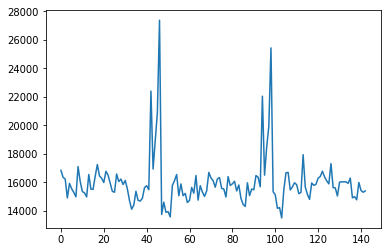

In [111]:
# Plot the mean weekly sales for all stores
by_date['mean_weekly_sales'].plot()

Or, you can include some error bars, which in this case do not give much info, only that the distribution
 appears to have small variance

<Container object of 3 artists>

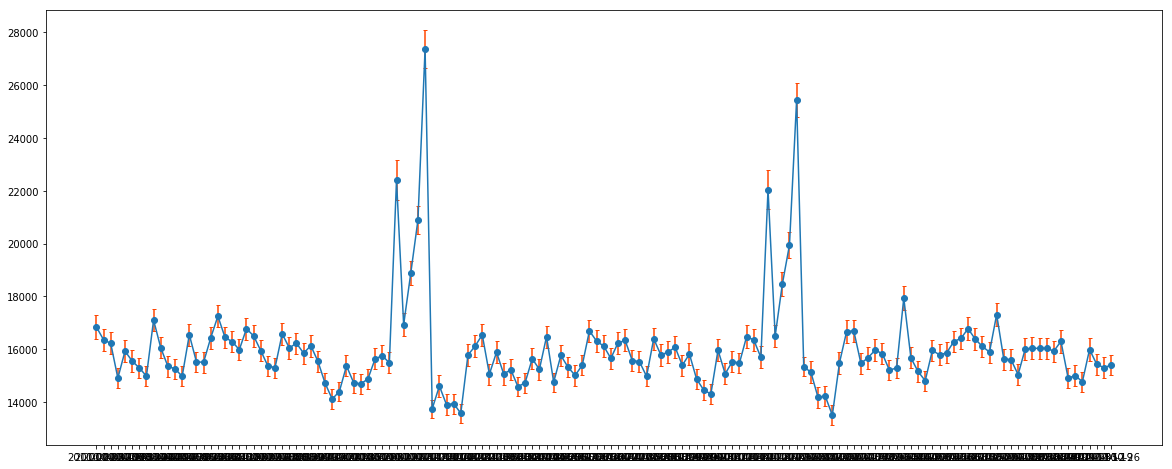

In [113]:
fig = plt.figure( figsize=(20,8))
plt.errorbar(by_date['Date'].astype('str'),by_date['mean_weekly_sales'], 
             yerr=by_date['std_weekly_sales'] / (by_date['count_weekly_sales'].pow(0.5)),
             fmt='-o', ecolor='orangered',capsize=2 )

Let's do it in just in the middle

Text(0.5,1,u'Mean Weekly Sales (all stores)')

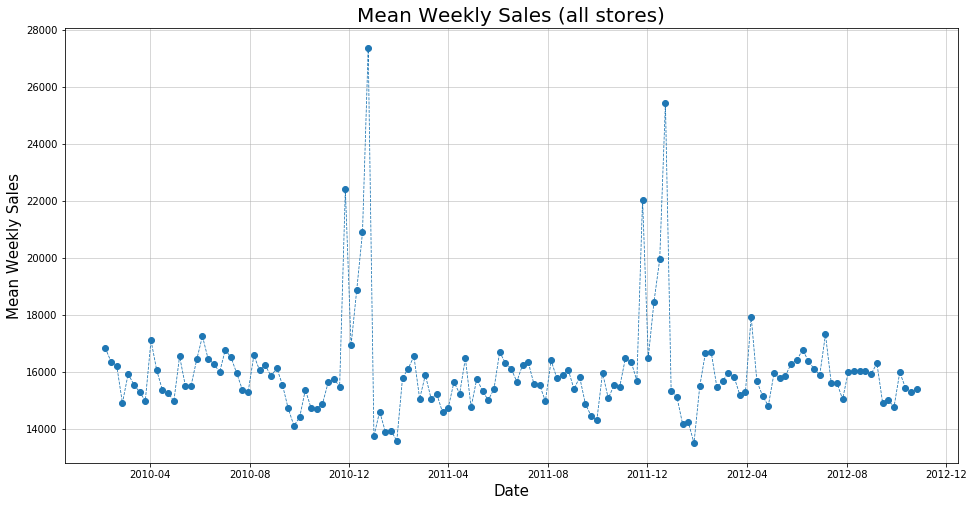

In [140]:
plt.figure(figsize=(16,8))
plt.plot_date(by_date['Date'], by_date['mean_weekly_sales'], '--o', linewidth=0.8, xdate=True )
plt.grid(b=True, linewidth = 0.5)
plt.xlabel('Date', fontdict={'fontsize': '15'})
plt.ylabel('Mean Weekly Sales', fontdict= {'fontsize': '15'})
plt.title('Mean Weekly Sales (all stores)', fontdict = {'fontsize':'20'})